In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [86]:
df = pd.read_csv("census income .csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


This dataset contains 32560 rows and 15 columns. Out of 15 columns 1 is our independent variable and remaining are dependent variables, and this is a classifiction problem.


In [87]:
df.head(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [88]:
df.tail(50)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32510,25,Local-gov,514716,Bachelors,13,Never-married,Adm-clerical,Own-child,Black,Female,0,0,40,United-States,<=50K
32511,20,Private,270436,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
32512,46,Private,42972,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,22,United-States,>50K
32513,40,Private,142657,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Black,Male,0,0,45,United-States,<=50K
32514,66,Federal-gov,47358,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,3471,0,40,United-States,<=50K
32515,30,Private,176175,Assoc-voc,11,Divorced,Adm-clerical,Unmarried,White,Female,0,0,24,United-States,<=50K
32516,36,Private,131459,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
32517,57,Local-gov,110417,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,99999,0,40,United-States,>50K
32518,46,Private,364548,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,48,United-States,>50K
32519,27,Private,177398,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,64,United-States,<=50K


In [89]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [90]:
df.columns.tolist()

['Age',
 'Workclass',
 'Fnlwgt',
 'Education',
 'Education_num',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week',
 'Native_country',
 'Income']

In [91]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

This dataset contain only 2 type of dataset i.e is int65 & object.

In [92]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

This dataset contain no null value.


In [93]:
#Removing the rows with missing values, as its showing some error and its not talking the NaN value.

# Filter and remove rows containing "?" in any column
df.drop(index=df[df.apply(lambda row: row.astype(str).str.contains(r'\?').any(), axis=1)].index, inplace=True)

print(df)


       Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divor

In [94]:
categorical_columns = ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country']
df = pd.get_dummies(df, columns=categorical_columns)
labelencoder = LabelEncoder()
df['Income'] = labelencoder.fit_transform(df['Income'])


In [95]:
df.nunique().to_frame("No. of unique values")

,No. of unique values
Age,72
Fnlwgt,20262
Education_num,16
Capital_gain,118
Capital_loss,90
...,...
Native_country_ Thailand,2
Native_country_ Trinadad&Tobago,2
Native_country_ United-States,2
Native_country_ Vietnam,2


In [96]:
print('Total Duplicated Rows are ',df.duplicated().sum())

Total Duplicated Rows are  23


In [97]:
df= df.drop_duplicates()

In [98]:
df.reset_index(drop=True, inplace=True)
print("Shape of DataFrame after removing duplicates",df.shape)

Shape of DataFrame after removing duplicates (30138, 105)


In [99]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income
count,30138.000000,3.013800e+04,30138.000000,30138.000000,30138.000000,30138.000000,30138.000000
mean,38.441702,1.897988e+05,10.122437,1092.805329,88.442863,40.934734,0.249054
std,13.131643,1.056584e+05,2.548727,7409.230902,404.451628,11.978951,0.432473
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176295e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784190e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376062e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


From the above discription we can observe the following things: The counts of all the columns are same which means there is no missing values in the dataset. The median(50%) value is less than the mean in some of the columns which means the data is little skewed to the right in these columns. In some of the columns it is shown that there is the huge diff between the 75% and max hence there are outliers present in the data.

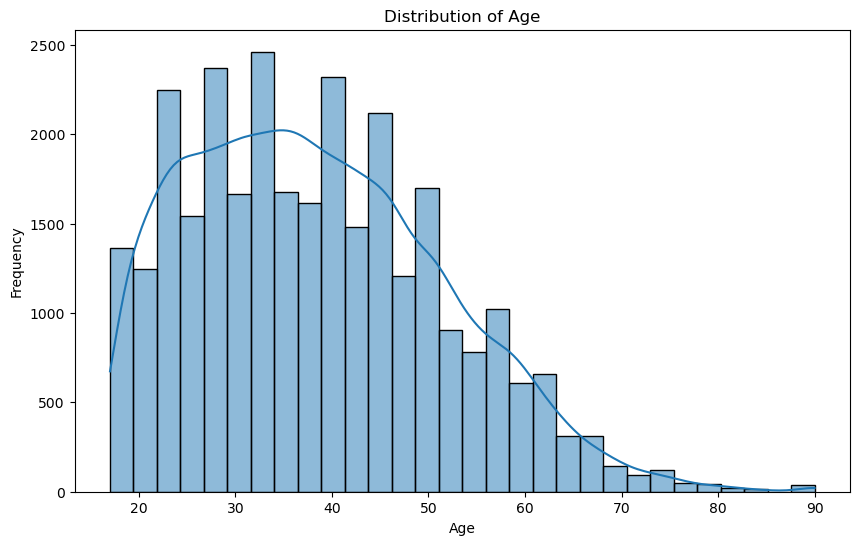

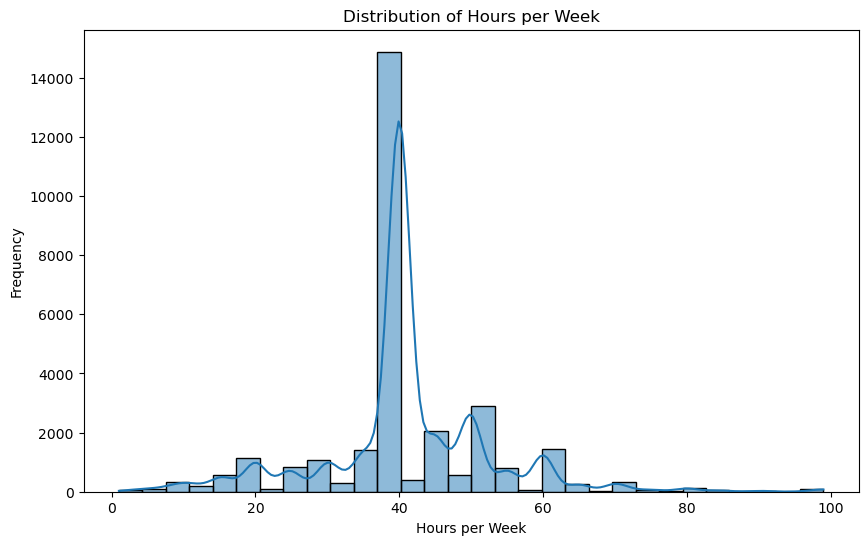

In [100]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Hours per week
plt.figure(figsize=(10, 6))
sns.histplot(df['Hours_per_week'], kde=True, bins=30)
plt.title('Distribution of Hours per Week')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.show()


Visualize Relationship between Features and Target Variable

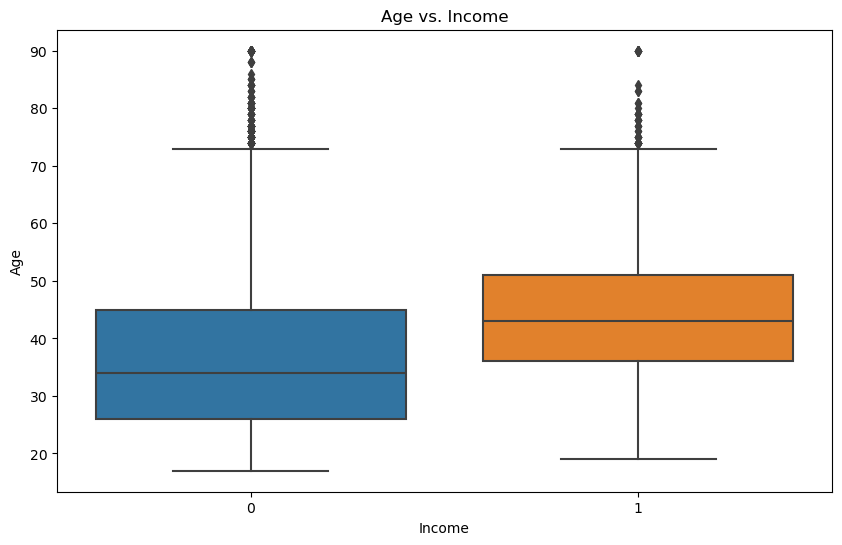

In [101]:
#age vs Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', y='Age', data=df)
plt.title('Age vs. Income')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()


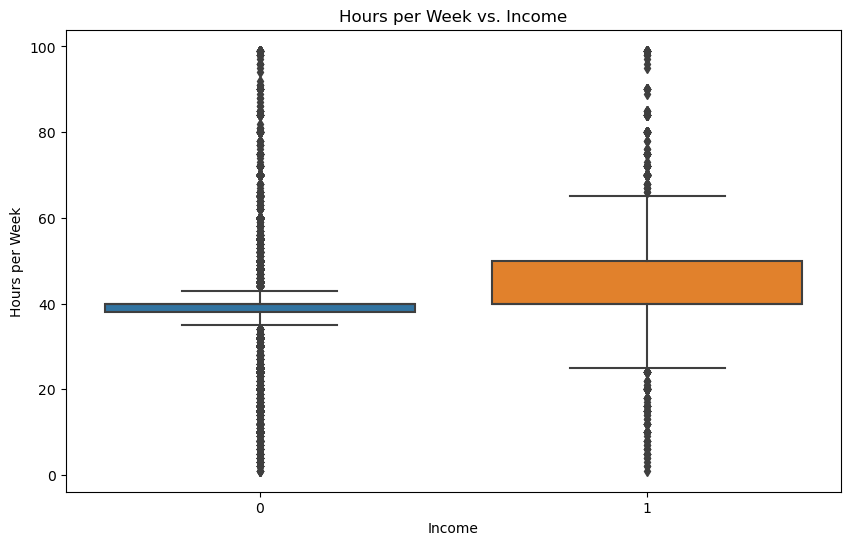

In [102]:
#Hours per week vs Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='Income', y='Hours_per_week', data=df)
plt.title('Hours per Week vs. Income')
plt.xlabel('Income')
plt.ylabel('Hours per Week')
plt.show()


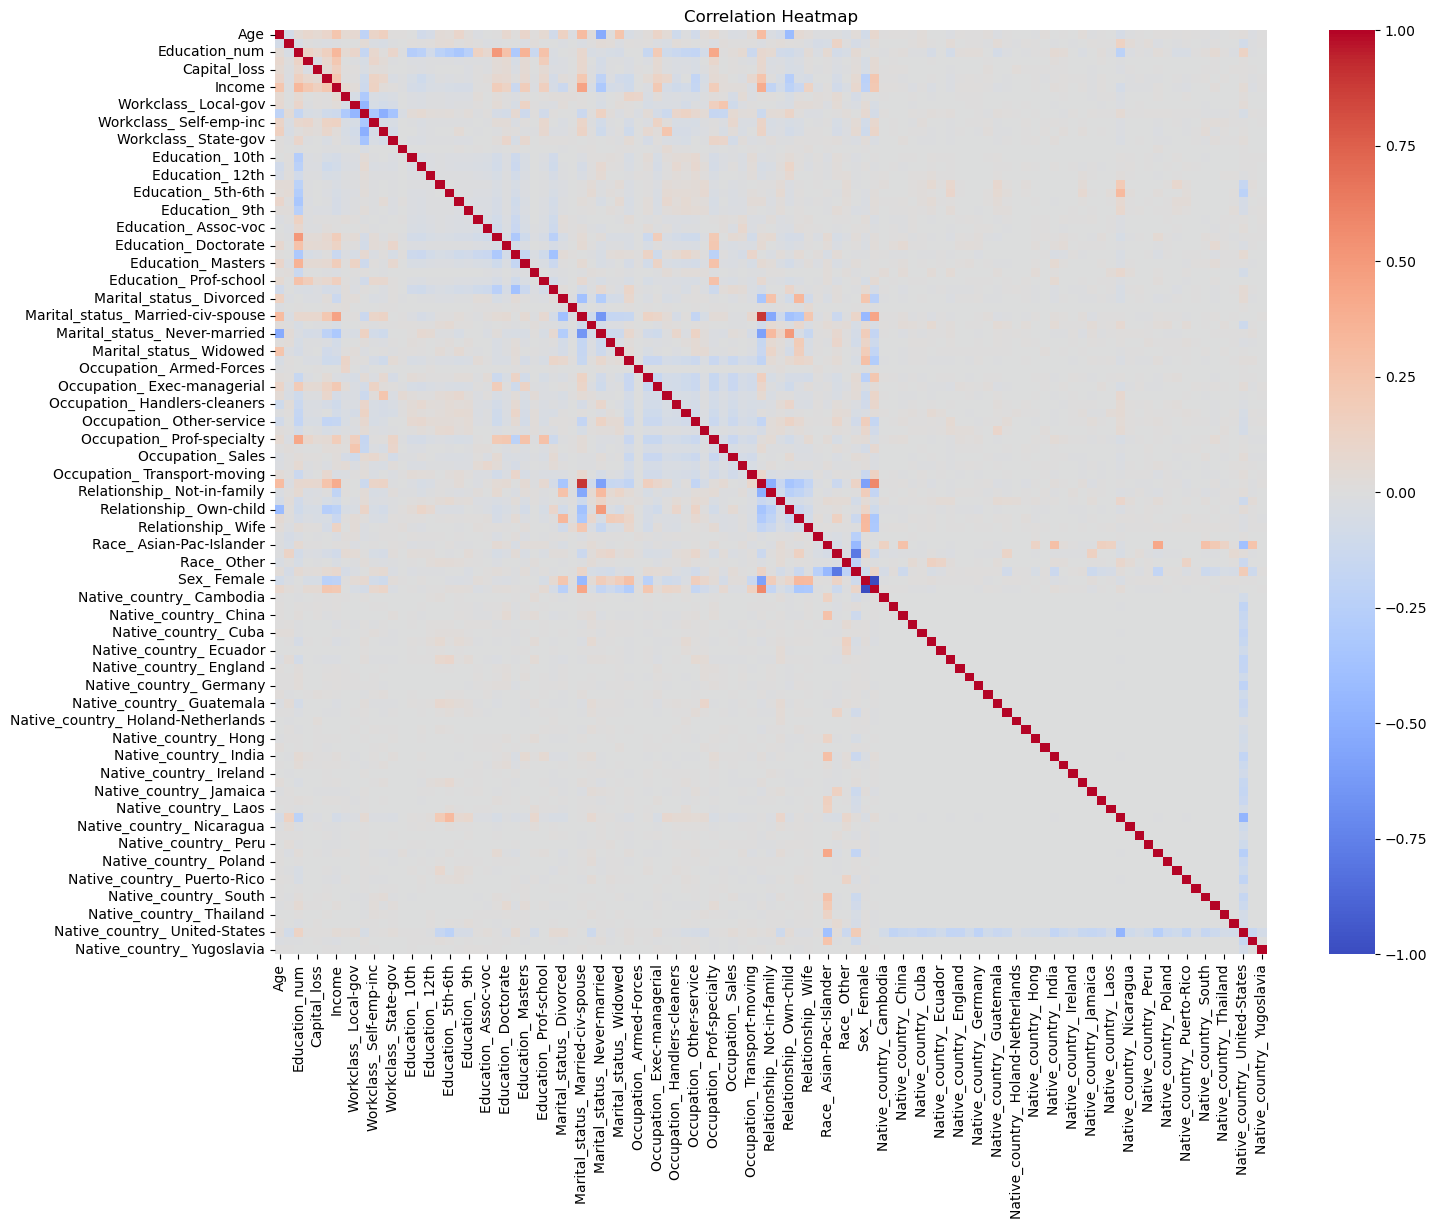

In [104]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [111]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Income,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
Age,1.000000,-0.067240,0.067485,0.128231,0.060448,0.145946,0.265018,0.061266,0.073230,-0.215171,...,0.002017,0.008422,0.000517,0.002155,-0.006032,-0.004395,0.009262,0.013076,-0.018733,0.001015
Fnlwgt,-0.067240,1.000000,-0.042491,-0.001610,-0.006646,-0.027952,-0.004219,-0.019910,-0.001373,0.057182,...,-0.013872,0.013352,-0.001755,-0.007436,0.004119,-0.000346,0.001464,-0.086304,-0.007584,0.006864
Education_num,0.067485,-0.042491,1.000000,0.149385,0.077755,0.152848,0.335444,0.058218,0.097348,-0.164909,...,-0.043111,-0.042148,0.001808,0.017806,0.049157,0.008180,-0.017160,0.126365,-0.010983,-0.001672
Capital_gain,0.128231,-0.001610,0.149385,1.000000,-0.062422,0.097227,0.311911,0.005693,0.000313,-0.056259,...,-0.004163,-0.007177,-0.005365,-0.003414,0.001085,-0.006671,-0.006864,0.019819,0.001327,-0.002260
Capital_loss,0.060448,-0.006646,0.077755,-0.062422,1.000000,0.050345,0.143255,0.010866,0.016546,-0.034748,...,-0.007471,-0.003741,-0.004248,0.005489,0.004768,-0.005281,0.007904,0.015238,0.000059,-0.005124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Native_country_ Thailand,-0.004395,-0.000346,0.008180,-0.006671,-0.005281,0.012846,-0.003987,-0.004270,-0.006447,-0.008138,...,-0.000798,-0.001431,-0.000454,-0.001154,-0.000887,1.000000,-0.000581,-0.076482,-0.001096,-0.000548
Native_country_ Trinadad&Tobago,0.009262,0.001464,-0.017160,-0.006864,0.007904,-0.007576,-0.007798,-0.004393,-0.001260,0.002173,...,-0.000822,-0.001473,-0.000467,-0.001188,-0.000913,-0.000581,1.000000,-0.078701,-0.001128,-0.000563
Native_country_ United-States,0.013076,-0.086304,0.126365,0.019819,0.015238,0.011019,0.039946,0.017478,0.032850,-0.049556,...,-0.108192,-0.193960,-0.061516,-0.156442,-0.120265,-0.076482,-0.078701,1.000000,-0.148513,-0.074197
Native_country_ Vietnam,-0.018733,-0.007584,-0.010983,0.001327,0.000059,-0.010399,-0.018233,-0.000010,-0.003962,0.009386,...,-0.001550,-0.002779,-0.000881,-0.002242,-0.001723,-0.001096,-0.001128,-0.148513,1.000000,-0.001063



Note- 0= no relation, -0.3 to +0.3- less corr, greater than +0.5 moderate corr, greater than +0.7 high corr

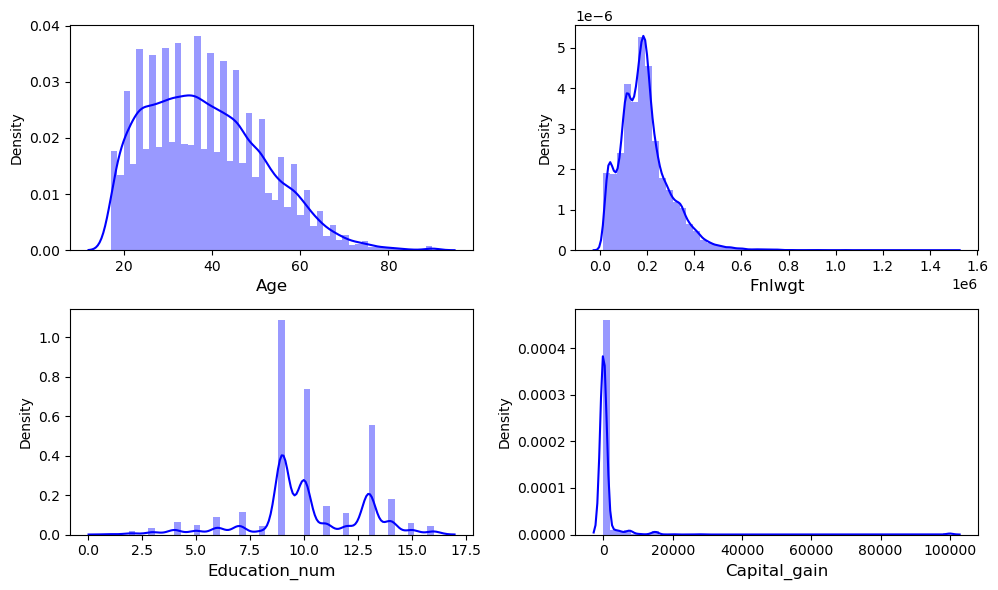

In [105]:
#checking the data distribution in different columns
plt.figure(figsize = (10,6), facecolor = 'white')
plotnumber = 1
for col in num_col:
    if plotnumber<=4:
        ax = plt.subplot(2,2, plotnumber)
        sns.distplot(df[col], color = 'b')
        plt.xlabel(col, fontsize = 12)
        plt.yticks(rotation = 0, fontsize= 10)
    plotnumber +=1
plt.tight_layout()

In [106]:
df.skew()

Age                                 0.528967
Fnlwgt                              1.460047
Education_num                      -0.302794
Capital_gain                       11.897934
Capital_loss                        4.524323
                                     ...    
Native_country_ Thailand           42.071371
Native_country_ Trinadad&Tobago    40.883986
Native_country_ United-States      -2.908880
Native_country_ Vietnam            21.632267
Native_country_ Yugoslavia         43.368338
Length: 105, dtype: float64

In [107]:
df.skew()

Age                                 0.528967
Fnlwgt                              1.460047
Education_num                      -0.302794
Capital_gain                       11.897934
Capital_loss                        4.524323
                                     ...    
Native_country_ Thailand           42.071371
Native_country_ Trinadad&Tobago    40.883986
Native_country_ United-States      -2.908880
Native_country_ Vietnam            21.632267
Native_country_ Yugoslavia         43.368338
Length: 105, dtype: float64

In [108]:
from scipy.stats import skew
def correct_skewness(df):
    
    skewness = df.apply(lambda x: skew(x.dropna()))
    skewness = skewness[abs(skewness) > 0.5]
    skewed_features = skewness.index
    for feat in skewed_features:
        df[feat] = np.cbrt(df[feat])
    return df

In [109]:
# Correct skewness
df_corrected = correct_skewness(df)

# Check the skewness again to verify
skewness_corrected = df_corrected.select_dtypes(include=[np.number]).apply(lambda x: skew(x.dropna()))
print(skewness_corrected)


Age                                 0.062834
Fnlwgt                             -0.160578
Education_num                      -0.302779
Capital_gain                        4.052553
Capital_loss                        4.297865
                                     ...    
Native_country_ Thailand           42.086096
Native_country_ Trinadad&Tobago    40.894582
Native_country_ United-States      -2.909716
Native_country_ Vietnam            21.645194
Native_country_ Yugoslavia         43.368759
Length: 103, dtype: float64


Now we have removed the skewness.

In [110]:
df1= df_corrected

In [113]:
# Split data
x = df.drop('Income', axis=1)
y = df['Income']
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [115]:
# Finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu =0
maxRS = 0
for i in range(1,10):
    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=.30, random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train, y_train)
    pred = RFR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS=i
print('Maximum accuracy is ', maxAccu,'On random_state ',maxRS) 

Maximum accuracy is  0.8567794735677947 On random_state  1


In [116]:
#creating tain test split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size= .30, random_state= maxRS)

In [117]:
#CLASSFICATION ALGORITHMS
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [118]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.8581066135810661
[[6364  506]
 [ 777 1395]]
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      6870
         1.0       0.73      0.64      0.68      2172

    accuracy                           0.86      9042
   macro avg       0.81      0.78      0.80      9042
weighted avg       0.85      0.86      0.85      9042



In [119]:
LR  = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.8427339084273391
[[6348  522]
 [ 900 1272]]
              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90      6870
         1.0       0.71      0.59      0.64      2172

    accuracy                           0.84      9042
   macro avg       0.79      0.75      0.77      9042
weighted avg       0.84      0.84      0.84      9042



In [120]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8272506082725061
[[6659  211]
 [1351  821]]
              precision    recall  f1-score   support

         0.0       0.83      0.97      0.90      6870
         1.0       0.80      0.38      0.51      2172

    accuracy                           0.83      9042
   macro avg       0.81      0.67      0.70      9042
weighted avg       0.82      0.83      0.80      9042



In [121]:
from sklearn.model_selection import cross_val_score

In [123]:
score = cross_val_score(RFC, x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predRFC)-score.mean())

[0.84970139 0.84389516 0.84970139 0.8558155  0.85183342]
0.8501893712313612
Difference between Accuracy score and cross val score is -  0.007917242349704923


In [125]:
score = cross_val_score(LR, x,y)
print(score)
print(score.mean())
print('Difference between Accuracy score and cross val score is - ', accuracy_score(y_test, predLR)-score.mean())

[0.83543464 0.83394161 0.8407432  0.83872573 0.83855981]
0.8374809981933764
Difference between Accuracy score and cross val score is -  0.005252910233962682


Random forest classifier is our best model as the diff between Accuracy and corss val score is the least.

In [126]:
#Hyper Parameter tuning 
#Random forst Classifier 
from sklearn.model_selection import GridSearchCV

parameters = {    'criterion': ['gini', 'entropy'],
    'random_state': [10, 20],
    'max_depth': [None, 10], 
    'n_jobs': [ -1, 1], 
    'n_estimators': [10, 50] 
}          

In [127]:
GCV =GridSearchCV(RandomForestClassifier(), parameters, cv=5)

In [128]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10], 'n_estimators': [10, 50],
                         'n_jobs': [-1, 1], 'random_state': [10, 20]})

In [129]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 50,
 'n_jobs': -1,
 'random_state': 20}

In [130]:
Final_model = RandomForestClassifier(criterion= 'entropy', max_depth= 10, n_estimators= 50, n_jobs= -2, random_state= 10)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

85.85489935854899


Our model is perfroming well on the data with maximum accuracy score of 85.85%.

In [131]:
#Calculating ROC and AUC 
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr, tpr, thresholds = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)

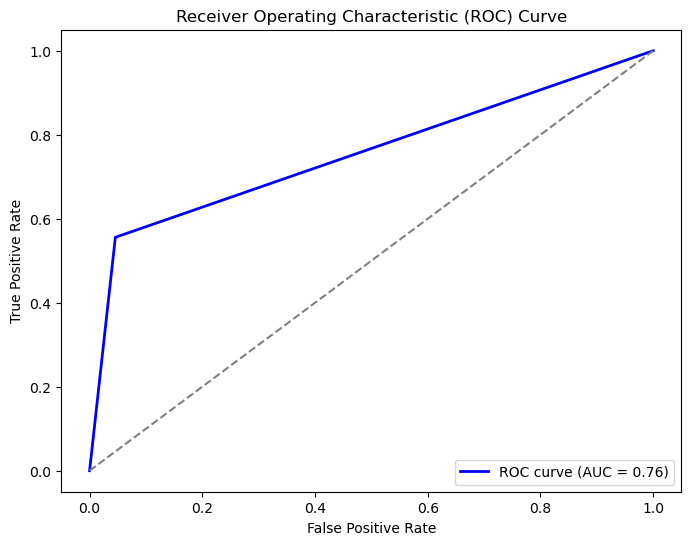

In [132]:
#plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [133]:
print("Best Hyperparameters:", GCV.best_params_)
print("AUC Value:", roc_auc)

Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50, 'n_jobs': -1, 'random_state': 20}
AUC Value: 0.7550015279821788


Since AUC values range from 0 to 1, where 0.5 represents random guessing and 1 represents perfect discrimination, an AUC value of 0.666 suggests that your model performs better than random guessing.